Author: Ben Campos

# Opiod Hackathon

Community effort analyzing data in overdoses. 

Working with CHOP members and Drexel members.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pprint
pd.options.display.max_columns = 50

In [31]:
data = pd.read_csv("OD_cleaned.csv")
size = data.shape
print("Number of Rows and Columns are :", size)

Number of Rows and Columns are : (10953, 43)


In [32]:
print(data.columns)

Index(['Incident ID', 'Incident Date', 'Incident Time', 'Day',
       'Incident County Name', 'Incident State', 'Victim ID', 'Gender Desc',
       'Age Range', 'Race', 'Ethnicity Desc', 'Victim State', 'Victim County',
       'Incident County FIPS Code', 'Incident County Latitude',
       'Incident County Longitude', 'Victim County FIPS Code',
       'Victim County Latitude', 'Victim County Longitude',
       'Incident County Latitude and Longitude',
       'Victim County Latitude and Longitude', 'Naloxone Administered',
       'Response Time Desc', 'Survive', 'COCAINE/CRACK', 'HEROIN', 'FENTANYL',
       'FENTANYL ANALOG/OTHER SYNTHETIC OPIOID', 'UNKNOWN',
       'PHARMACEUTICAL OPIOID', 'MARIJUANA', 'ALCOHOL', 'SYNTHETIC MARIJUANA',
       'PHARMACEUTICAL OTHER',
       'BENZODIAZEPINES (I.E.VALIUM, XANAX, ATIVAN, ETC)', 'OTHER',
       'BARBITURATES (I.E. AMYTAL, NEMBUTAL, ETC)', 'CARFENTANIL', 'SUBOXONE',
       'METHADONE', 'METHAMPHETAMINE', 'BATH SALTS',
       'PHARMACEUTICAL S

In [33]:
data.head(2)

,Incident ID,Incident Date,Incident Time,Day,Incident County Name,Incident State,Victim ID,Gender Desc,Age Range,Race,Ethnicity Desc,Victim State,Victim County,Incident County FIPS Code,Incident County Latitude,Incident County Longitude,Victim County FIPS Code,Victim County Latitude,Victim County Longitude,Incident County Latitude and Longitude,Victim County Latitude and Longitude,Naloxone Administered,Response Time Desc,Survive,COCAINE/CRACK,HEROIN,FENTANYL,FENTANYL ANALOG/OTHER SYNTHETIC OPIOID,UNKNOWN,PHARMACEUTICAL OPIOID,MARIJUANA,ALCOHOL,SYNTHETIC MARIJUANA,PHARMACEUTICAL OTHER,"BENZODIAZEPINES (I.E.VALIUM, XANAX, ATIVAN, ETC)",OTHER,"BARBITURATES (I.E. AMYTAL, NEMBUTAL, ETC)",CARFENTANIL,SUBOXONE,METHADONE,METHAMPHETAMINE,BATH SALTS,PHARMACEUTICAL STIMULANT
0,1,01/04/2018,00:42:00,Thursday,Delaware,Pennsylvania,1,Male,50 - 59,White,Not Hispanic,Pennsylvania,Delaware,45,39.916579,-75.406277,45.0,39.916579,-75.406277,"(39.916579, -75.406277)","(39.916579, -75.406277)",Y,NaN,N,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,26,01/26/2018,09:14:00,Friday,Chester,Pennsylvania,5,Male,25 - 29,White,Not Hispanic,Pennsylvania,Chester,29,39.974871,-75.756265,29.0,39.974871,-75.756265,"(39.974871, -75.756265)","(39.974871, -75.756265)",N,NaN,N,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
drug_list = ['COCAINE/CRACK', 'HEROIN', 'FENTANYL',
       'FENTANYL ANALOG/OTHER SYNTHETIC OPIOID', 'UNKNOWN',
       'PHARMACEUTICAL OPIOID', 'MARIJUANA', 'ALCOHOL', 'SYNTHETIC MARIJUANA',
       'PHARMACEUTICAL OTHER',
       'BENZODIAZEPINES (I.E.VALIUM, XANAX, ATIVAN, ETC)', 'OTHER',
       'BARBITURATES (I.E. AMYTAL, NEMBUTAL, ETC)', 'CARFENTANIL', 'SUBOXONE',
       'METHADONE', 'METHAMPHETAMINE', 'BATH SALTS',
       'PHARMACEUTICAL STIMULANT']

drug_list_MOD = ['COCAINE/CRACK', 'HEROIN', 'FENTANYL',
       'FENTANYL ANALOG/OTHER SYNTHETIC OPIOID', 'UNKNOWN',
       'PHARMACEUTICAL OPIOID', 'MARIJUANA', 'ALCOHOL', 'SYNTHETIC MARIJUANA',
       'PHARMACEUTICAL OTHER',
       'BENZODIAZEPINES (I.E.VALIUM, XANAX, ATIVAN, ETC)', 'OTHER',
       'BARBITURATES (I.E. AMYTAL, NEMBUTAL, ETC)', 'CARFENTANIL', 'SUBOXONE',
       'METHADONE', 'METHAMPHETAMINE', 'BATH SALTS',
       'PHARMACEUTICAL STIMULANT','multiple_substances']

In [35]:
substances = data.loc[:,'COCAINE/CRACK':'PHARMACEUTICAL STIMULANT']

list_ = ['Incident ID','COCAINE/CRACK','HEROIN','FENTANYL','FENTANYL ANALOG/OTHER SYNTHETIC OPIOID','UNKNOWN',
        'PHARMACEUTICAL OPIOID','MARIJUANA','ALCOHOL','SYNTHETIC MARIJUANA','PHARMACEUTICAL OTHER','BENZODIAZEPINES (I.E.VALIUM, XANAX, ATIVAN, ETC)',
        'OTHER','BARBITURATES (I.E. AMYTAL, NEMBUTAL, ETC)','CARFENTANIL','SUBOXONE','METHADONE','METHAMPHETAMINE','BATH SALTS',
        'PHARMACEUTICAL STIMULANT']

mod_subs = data.loc[:,list_]

mod_subs.head()

,Incident ID,COCAINE/CRACK,HEROIN,FENTANYL,FENTANYL ANALOG/OTHER SYNTHETIC OPIOID,UNKNOWN,PHARMACEUTICAL OPIOID,MARIJUANA,ALCOHOL,SYNTHETIC MARIJUANA,PHARMACEUTICAL OTHER,"BENZODIAZEPINES (I.E.VALIUM, XANAX, ATIVAN, ETC)",OTHER,"BARBITURATES (I.E. AMYTAL, NEMBUTAL, ETC)",CARFENTANIL,SUBOXONE,METHADONE,METHAMPHETAMINE,BATH SALTS,PHARMACEUTICAL STIMULANT
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,26,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,28,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,29,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Showcasing number of instances of substance overdoses

In [36]:
mentioned_substance = substances.isin([1]).sum(axis=0)

mentioned_sub = mentioned_substance.sort_values(ascending = False)
mentioned_sub

HEROIN                                              7974
FENTANYL                                            1898
UNKNOWN                                             1623
PHARMACEUTICAL OPIOID                                432
COCAINE/CRACK                                        359
OTHER                                                337
FENTANYL ANALOG/OTHER SYNTHETIC OPIOID               282
PHARMACEUTICAL OTHER                                 277
ALCOHOL                                              274
BENZODIAZEPINES (I.E.VALIUM, XANAX, ATIVAN, ETC)     268
METHAMPHETAMINE                                      260
MARIJUANA                                            188
SYNTHETIC MARIJUANA                                  142
SUBOXONE                                             115
CARFENTANIL                                           80
METHADONE                                             64
PHARMACEUTICAL STIMULANT                              20
BARBITURATES (I.E. AMYTAL, NEMB

In [37]:
not_mentioned_substance = substances.isin([0]).sum(axis=0)

notmentioned_sub = not_mentioned_substance.sort_values(ascending = False)
notmentioned_sub

BATH SALTS                                          10942
BARBITURATES (I.E. AMYTAL, NEMBUTAL, ETC)           10934
PHARMACEUTICAL STIMULANT                            10933
METHADONE                                           10889
CARFENTANIL                                         10873
SUBOXONE                                            10838
SYNTHETIC MARIJUANA                                 10811
MARIJUANA                                           10765
METHAMPHETAMINE                                     10693
BENZODIAZEPINES (I.E.VALIUM, XANAX, ATIVAN, ETC)    10685
ALCOHOL                                             10679
PHARMACEUTICAL OTHER                                10676
FENTANYL ANALOG/OTHER SYNTHETIC OPIOID              10671
OTHER                                               10616
COCAINE/CRACK                                       10594
PHARMACEUTICAL OPIOID                               10521
UNKNOWN                                              9330
FENTANYL      

#### Labeling users who had more than 1 drug in their system

In [38]:
newdf = substances
newdf['multiple_drugs'] = ['yes' if x > 1 else 'no' for x in np.sum(newdf.values == 1, 1)]

In [39]:
more_than_1 = newdf[newdf['multiple_drugs'] == 'yes']
only_1 = newdf[newdf['multiple_drugs'] == 'no']
print("Number of people who had more than 1 drug in their system :", len(more_than_1))
print("Number of people who only had 1 drug in their system :", len(only_1))

Number of people who had more than 1 drug in their system : 2857
Number of people who only had 1 drug in their system : 8096


In [40]:
list_of_drugs = newdf['multiple_drugs'].values.tolist()

#adding multiple substances into data dataframe
data['multiple_substances'] = list_of_drugs

#### Gender Percentages

In [41]:
print ("The percentage of genders: \n", data['Gender Desc'].value_counts()*100/data.shape[0])

The percentage of genders: 
 Male       68.620469
Female     31.151283
Unknown     0.228248
Name: Gender Desc, dtype: float64


#### The percentage of Male, Female, and Unknown for the dataset are

Male - 68.6

Female - 31.1

Unknown - 0.22

In [42]:
def barplot(df, column, title, top = 5):

    counts = df[column].value_counts().head(top)
    
    ## It's width by height, so let's make this one wide!
    fig = plt.figure(figsize = (8, 4))

    ## note the plot.bar() function takes an x-positon for bars
    ## in the event that data are not categorical,
    ## but we'll just use discrete positioning, i.e., left = [1,2,3, ...]
    ## to space out the bars
    _  = plt.bar(
        x = range(1, counts.shape[0] + 1),
        height = counts,
        tick_label = list(counts.index)
    )

    ## Set the tick and label fontsize
    plt.tick_params(labelsize = 15)

    ## Set the title
    _ = plt.title(title, fontsize = 15)

    ## Set the x,y-labels
    _ = plt.xticks(rotation = 'vertical', fontsize = 13)
    _ = plt.ylabel("", fontsize = 13)

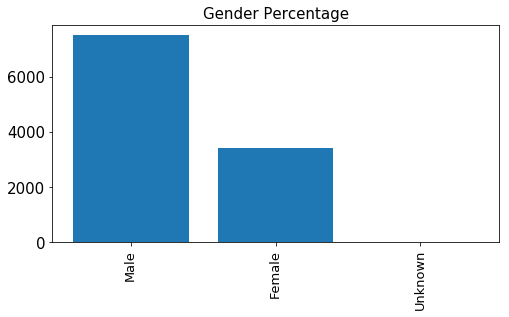

In [43]:
barplot(data, 'Gender Desc', "Gender Percentage")

In [44]:
data['year'] = pd.to_datetime(data['Incident Date']).dt.year
data['month'] = pd.to_datetime(data['Incident Date']).dt.month

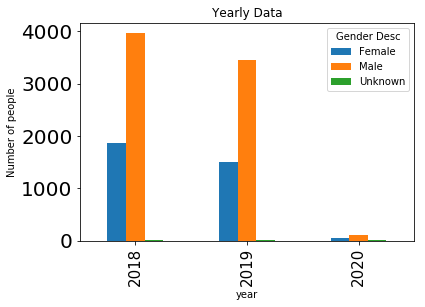

In [45]:
data.groupby(['year','Gender Desc'])['Incident ID'].size().unstack().plot(kind='bar',stacked=False)
plt.tick_params(labelsize = 20)
_ = plt.xticks(rotation = 'vertical', fontsize = 15)
_ = plt.ylabel('Number of people', fontsize = 10)
_ = plt.title("Yearly Data")
plt.show()

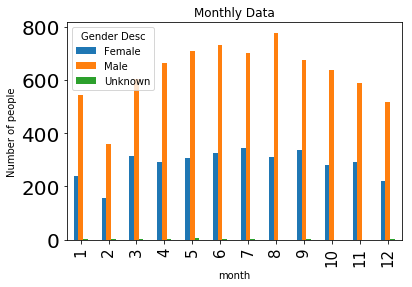

In [46]:
data.groupby(['month','Gender Desc'])['Incident ID'].size().unstack().plot(kind='bar',stacked=False)
plt.tick_params(labelsize = 20)
_ = plt.xticks(rotation = 'vertical', fontsize = 15)
_ = plt.ylabel('Number of people', fontsize = 10)
_ = plt.title("Monthly Data")
plt.show()

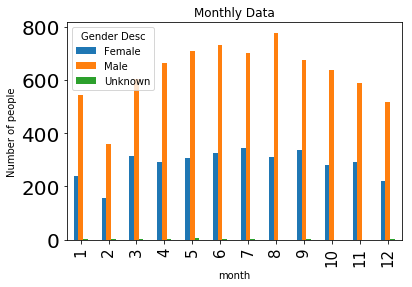

In [47]:
data.groupby(['month','Gender Desc'])['multiple_substances'].size().unstack().plot(kind='bar',stacked=False)
plt.tick_params(labelsize = 20)
_ = plt.xticks(rotation = 'vertical', fontsize = 15)
_ = plt.ylabel('Number of people', fontsize = 10)
_ = plt.title("Monthly Data")
plt.show()

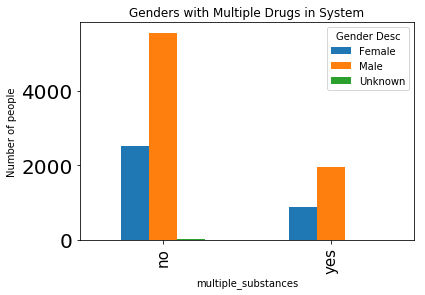

In [48]:
data.groupby(['multiple_substances','Gender Desc'])['multiple_substances'].size().unstack().plot(kind='bar',stacked=False)
plt.tick_params(labelsize = 20)
_ = plt.xticks(rotation = 'vertical', fontsize = 15)
_ = plt.ylabel('Number of people', fontsize = 10)
_ = plt.title("Genders with Multiple Drugs in System")
plt.show()

In [49]:
print(data['Age Range'].unique())

['50 - 59' '25 - 29' '30 - 39' '40 - 49' '20 - 24' '15 - 19' '60 - 69'
 '70 - 79' '0 - 9' '80 - *' '10 - 14']


In [50]:
b = data['year'].unique()
print(b)

[2018 2019 2020]


In [51]:
a = data['Victim County'].unique()
print("Number of Counties: ",len(a),"\n",a)

Number of Counties:  69 
 ['Delaware' 'Chester' 'Beaver' 'Montgomery' 'Bucks' nan 'Cumberland'
 'Northumberland' 'Pike' 'Armstrong' 'Carbon' 'Out of State' 'Bradford'
 'Dauphin' 'Lehigh' 'Bedford' 'Erie' 'York' 'Adams' 'Lebanon' 'Monroe'
 'Franklin' 'Lancaster' 'Berks' 'Northampton' 'Jefferson' 'Mifflin'
 'Allegheny' 'Westmoreland' 'Crawford' 'Blair' 'Washington' 'Luzerne'
 'Lackawanna' 'Elk' 'Lycoming' 'Philadelphia' 'Snyder' 'Lawrence' 'Perry'
 'Wayne' 'Potter' 'Centre' 'Juniata' 'Cambria' 'Wyoming' 'Susquehanna'
 'Schuylkill' 'Clearfield' 'Tioga' 'Columbia' 'Fulton' 'Mercer' 'Indiana'
 'Union' 'Butler' 'Somerset' 'Fayette' 'Clarion' 'Montour' 'Greene'
 'Huntingdon' 'McKean' 'Forest' 'Clinton' 'Venango' 'Warren' 'Cameron'
 'Sullivan']


In [52]:
## separated by year dataframe #######################
year_2018 = data[data['year'] == 2018]
year_2019 = data[data['year'] == 2019]
year_2020 = data[data['year'] == 2020]
######################################################

## separated by year/drugs dataframe##################
year_2018_drugs = year_2018[drug_list]
year_2019_drugs = year_2019[drug_list]
year_2020_drugs = year_2020[drug_list]
######################################################

sub_count_2018 = year_2018_drugs.isin([1]).sum(axis=0)
sub_count_2018 = sub_count_2018.sort_values(ascending = False)

sub_count_2019 = year_2019_drugs.isin([1]).sum(axis=0)
sub_count_2019 = sub_count_2019.sort_values(ascending = False)

sub_count_2020 = year_2020_drugs.isin([1]).sum(axis=0)
sub_count_2020 = sub_count_2020.sort_values(ascending = False)

print("2018 counts: \n", sub_count_2018)
print("2019 counts: \n", sub_count_2019)
print("2020 counts: \n", sub_count_2020)

2018 counts: 
 HEROIN                                              4241
UNKNOWN                                              909
FENTANYL                                             798
PHARMACEUTICAL OPIOID                                233
COCAINE/CRACK                                        200
OTHER                                                162
BENZODIAZEPINES (I.E.VALIUM, XANAX, ATIVAN, ETC)     148
FENTANYL ANALOG/OTHER SYNTHETIC OPIOID               133
PHARMACEUTICAL OTHER                                 128
ALCOHOL                                              127
METHAMPHETAMINE                                      117
MARIJUANA                                             95
SYNTHETIC MARIJUANA                                   87
SUBOXONE                                              64
CARFENTANIL                                           51
METHADONE                                             35
PHARMACEUTICAL STIMULANT                              14
BARBITURATES (I.

In [53]:
mod_list = ['HEROIN','UNKNOWN','FENTANYL','PHARMACEUTICAL OPIOID','COCAINE/CRACK','OTHER','BENZODIAZEPINES (I.E.VALIUM, XANAX, ATIVAN, ETC)','FENTANYL ANALOG/OTHER SYNTHETIC OPIOID',
           'PHARMACEUTICAL OTHER','ALCOHOL','METHAMPHETAMINE','MARIJUANA','SYNTHETIC MARIJUANA','SUBOXONE','CARFENTANIL','METHADONE','PHARMACEUTICAL STIMULANT',
           'BARBITURATES (I.E. AMYTAL, NEMBUTAL, ETC)','BATH SALTS']
            
#'MORE THAN 1 Drug','Naloxone Yes','Naloxone No','Survive Yes','Survive No']

#BENZODIAZEPINES (I.E.VALIUM, XANAX, ATIVAN, ETC)	OTHER	BARBITURATES (I.E. AMYTAL, NEMBUTAL, ETC)

separating genders and labeling their drugs/naloxone

In [54]:
#men/women/unknown 2018
men_18 = year_2018[year_2018['Gender Desc'] == 'Male']
men_18_ = men_18[mod_list]
sub_MEN_2018 = men_18_.isin([1]).sum(axis=0)
sub_MEN_2018 = sub_MEN_2018.sort_values(ascending = False)

women_18 = year_2018[year_2018['Gender Desc'] == 'Female']
women_18_ = women_18[mod_list]
sub_WOMEN_2018 = women_18_.isin([1]).sum(axis=0)
sub_WOMEN_2018 = sub_WOMEN_2018.sort_values(ascending = False)

unkn_18 = year_2018[year_2018['Gender Desc'] == 'Unknown']
unkn_18_ = unkn_18[mod_list]
sub_UNKN_2018 = unkn_18_.isin([1]).sum(axis=0)
sub_UNKN_2018 = sub_UNKN_2018.sort_values(ascending = False)



####################
#men/women/unknown 2019

men_19 = year_2019[year_2019['Gender Desc'] == 'Male']
men_19_ = men_19[mod_list]
sub_MEN_2019 = men_19_.isin([1]).sum(axis=0)
sub_MEN_2019 = sub_MEN_2019.sort_values(ascending = False)

women_19 = year_2019[year_2019['Gender Desc'] == 'Female']
women_19_ = women_19[mod_list]
sub_WOMEN_2019 = women_19_.isin([1]).sum(axis=0)
sub_WOMEN_2019 = sub_WOMEN_2019.sort_values(ascending = False)

unkn_19 = year_2019[year_2019['Gender Desc'] == 'Unknown']
unkn_19_ = unkn_19[mod_list]
sub_UNKN_2019 = unkn_19_.isin([1]).sum(axis=0)
sub_UNKN_2019 = sub_UNKN_2019.sort_values(ascending = False)

####################
#men/women/unknown 2020

men_20 = year_2020[year_2020['Gender Desc'] == 'Male']
men_20_ = men_20[mod_list]
sub_MEN_2020 = men_20_.isin([1]).sum(axis=0)
sub_MEN_2020 = sub_MEN_2020.sort_values(ascending = False)

women_20 = year_2020[year_2020['Gender Desc'] == 'Female']
women_20_ = women_20[mod_list]
sub_WOMEN_2020 = women_20_.isin([1]).sum(axis=0)
sub_WOMEN_2020 = sub_WOMEN_2020.sort_values(ascending = False)

unkn_20 = year_2020[year_2020['Gender Desc'] == 'Unknown']
unkn_20_ = unkn_20[mod_list]
sub_UNKN_2020 = unkn_20_.isin([1]).sum(axis=0)
sub_UNKN_2020 = sub_UNKN_2020.sort_values(ascending = False)


print("2020 Unknown Drug Counts: \t", sub_UNKN_2020)

####################

2020 Unknown Drug Counts: 	 HEROIN                                              1
PHARMACEUTICAL OTHER                                0
UNKNOWN                                             0
FENTANYL                                            0
PHARMACEUTICAL OPIOID                               0
COCAINE/CRACK                                       0
OTHER                                               0
BENZODIAZEPINES (I.E.VALIUM, XANAX, ATIVAN, ETC)    0
FENTANYL ANALOG/OTHER SYNTHETIC OPIOID              0
BATH SALTS                                          0
BARBITURATES (I.E. AMYTAL, NEMBUTAL, ETC)           0
METHAMPHETAMINE                                     0
MARIJUANA                                           0
SYNTHETIC MARIJUANA                                 0
SUBOXONE                                            0
CARFENTANIL                                         0
METHADONE                                           0
PHARMACEUTICAL STIMULANT                            0


In [55]:

#2018
men_mult_18 = men_18[men_18['multiple_substances'] == 'yes']
men_mult_18_1 = men_18[men_18['Naloxone Administered'] == 'Y']
men_mult_18_2 = men_18[men_18['Naloxone Administered'] == 'N']
men_mult_18_3 = men_18[men_18['Survive'] == 'Y']
men_mult_18_4 = men_18[men_18['Survive'] == 'N']


women_mult_18 = women_18[women_18['multiple_substances'] == 'yes']
women_mult_18_1 = women_18[women_18['Naloxone Administered'] == 'Y']
women_mult_18_2 = women_18[women_18['Naloxone Administered'] == 'N']
women_mult_18_3 = women_18[women_18['Survive'] == 'Y']
women_mult_18_4 = women_18[women_18['Survive'] == 'N']

unk_mult_18 = unkn_18[unkn_18['multiple_substances'] == 'yes']
unk_mult_18_1 = unkn_18[unkn_18['Naloxone Administered'] == 'Y']
unk_mult_18_2 = unkn_18[unkn_18['Naloxone Administered'] == 'N']
unk_mult_18_3 = unkn_18[unkn_18['Survive'] == 'Y']
unk_mult_18_4 = unkn_18[unkn_18['Survive'] == 'N']

#2019
men_mult_19 = men_19[men_19['multiple_substances'] == 'yes']
men_mult_19_1 = men_19[men_19['Naloxone Administered'] == 'Y']
men_mult_19_2 = men_19[men_19['Naloxone Administered'] == 'N']
men_mult_19_3 = men_19[men_19['Survive'] == 'Y']
men_mult_19_4 = men_19[men_19['Survive'] == 'N']


women_mult_19 = women_19[women_19['multiple_substances'] == 'yes']
women_mult_19_1 = women_19[women_19['Naloxone Administered'] == 'Y']
women_mult_19_2 = women_19[women_19['Naloxone Administered'] == 'N']
women_mult_19_3 = women_19[women_19['Survive'] == 'Y']
women_mult_19_4 = women_19[women_19['Survive'] == 'N']

unk_mult_19 = unkn_19[unkn_19['multiple_substances'] == 'yes']
unk_mult_19_1 = unkn_19[unkn_19['Naloxone Administered'] == 'Y']
unk_mult_19_2 = unkn_19[unkn_19['Naloxone Administered'] == 'N']
unk_mult_19_3 = unkn_19[unkn_19['Survive'] == 'Y']
unk_mult_19_4 = unkn_19[unkn_19['Survive'] == 'N']

#2020
men_mult_20 = men_20[men_20['multiple_substances'] == 'yes']
men_mult_20_1 = men_20[men_20['Naloxone Administered'] == 'Y']
men_mult_20_2 = men_20[men_20['Naloxone Administered'] == 'N']
men_mult_20_3 = men_20[men_20['Survive'] == 'Y']
men_mult_20_4 = men_20[men_20['Survive'] == 'N']


women_mult_20 = women_20[women_20['multiple_substances'] == 'yes']
women_mult_20_1 = women_20[women_20['Naloxone Administered'] == 'Y']
women_mult_20_2 = women_20[women_20['Naloxone Administered'] == 'N']
women_mult_20_3 = women_20[women_20['Survive'] == 'Y']
women_mult_20_4 = women_20[women_20['Survive'] == 'N']

unk_mult_20 = unkn_20[unkn_20['multiple_substances'] == 'yes']
unk_mult_20_1 = unkn_20[unkn_20['Naloxone Administered'] == 'Y']
unk_mult_20_2 = unkn_20[unkn_20['Naloxone Administered'] == 'N']
unk_mult_20_3 = unkn_20[unkn_20['Survive'] == 'Y']
unk_mult_20_4 = unkn_20[unkn_20['Survive'] == 'N']



print("men more than 1 sub 2018,2019,2020: ",len(men_mult_18),len(men_mult_19),len(men_mult_20), "\n")
print("women more than 1 sub 2018,2019,2020 : ",len(women_mult_18),len(women_mult_19),len(women_mult_20), "\n")
print("unk more than 1 sub 2018,2019,2020: ",len(unk_mult_18),len(unk_mult_19),len(unk_mult_20), "\n")

print("men naloxone admin 2018,2019,2020: ",len(men_mult_18_1),len(men_mult_19_1),len(men_mult_20_1), "\n")
print("women naloxone admin 2018,2019,2020 : ",len(women_mult_18_1),len(women_mult_19_1),len(women_mult_20_1), "\n")
print("unk naloxone admin 2018,2019,2020: ",len(unk_mult_18_1),len(unk_mult_19_1),len(unk_mult_20_1), "\n")

print("men naloxone admin N 2018,2019,2020: ",len(men_mult_18_2),len(men_mult_19_2),len(men_mult_20_2), "\n")
print("women naloxone admin N 2018,2019,2020 : ",len(women_mult_18_2),len(women_mult_19_2),len(women_mult_20_2), "\n")
print("unk naloxone admin N 2018,2019,2020: ",len(unk_mult_18_2),len(unk_mult_19_2),len(unk_mult_20_2), "\n")

print("men survive 2018,2019,2020: ",len(men_mult_18_3),len(men_mult_19_3),len(men_mult_20_3), "\n")
print("women survive 2018,2019,2020 : ",len(women_mult_18_3),len(women_mult_19_3),len(women_mult_20_3), "\n")
print("unk survive 2018,2019,2020: ",len(unk_mult_18_3),len(unk_mult_19_3),len(unk_mult_20_3), "\n")

print("men didnt survive 2018,2019,2020: ",len(men_mult_18_4),len(men_mult_19_4),len(men_mult_20_4), "\n")
print("women didnt survive 2018,2019,2020 : ",len(women_mult_18_4),len(women_mult_19_4),len(women_mult_20_4), "\n")
print("unk didnt survive 2018,2019,2020: ",len(unk_mult_18_4),len(unk_mult_19_4),len(unk_mult_20_4), "\n")

men more than 1 sub 2018,2019,2020:  867 1064 34 

women more than 1 sub 2018,2019,2020 :  425 441 17 

unk more than 1 sub 2018,2019,2020:  2 7 0 

men naloxone admin 2018,2019,2020:  2581 2368 77 

women naloxone admin 2018,2019,2020 :  1205 967 27 

unk naloxone admin 2018,2019,2020:  2 8 1 

men naloxone admin N 2018,2019,2020:  1379 1077 34 

women naloxone admin N 2018,2019,2020 :  666 528 19 

unk naloxone admin N 2018,2019,2020:  7 7 0 

men survive 2018,2019,2020:  3010 2686 96 

women survive 2018,2019,2020 :  1438 1187 38 

unk survive 2018,2019,2020:  5 10 1 

men didnt survive 2018,2019,2020:  691 579 13 

women didnt survive 2018,2019,2020 :  280 228 7 

unk didnt survive 2018,2019,2020:  3 5 0 



In [56]:
#more than 1 substance
menmore18 = year_2018[year_2018['multiple_substances'] == 'yes']
femmore18 = year_2018[year_2018['multiple_substances'] == 'yes']
unkmore18 = year_2018[year_2018['multiple_substances'] == 'yes']

menmore19 = year_2019[year_2019['multiple_substances'] == 'yes']
femmore19 = year_2019[year_2019['multiple_substances'] == 'yes']
unkmore19 = year_2019[year_2019['multiple_substances'] == 'yes']

menmore20 = year_2020[year_2020['multiple_substances'] == 'yes']
femmore20 = year_2020[year_2020['multiple_substances'] == 'yes']
unkmore20 = year_2020[year_2020['multiple_substances'] == 'yes']



print("more than 1 sub 2018: ",len(menmore18), "\n")
print("more than 1 sub 2019: ",len(menmore19), "\n")
print("more than 1 sub 2020: ",len(menmore20), "\n")

more than 1 sub 2018:  1294 

more than 1 sub 2019:  1512 

more than 1 sub 2020:  51 



In [57]:
#more than 1 substance
more18 = year_2018[year_2018['multiple_substances'] == 'yes']
more19 = year_2019[year_2019['multiple_substances'] == 'yes']
more20 = year_2020[year_2020['multiple_substances'] == 'yes']


print("more than 1 sub 2018: ",len(more18), "\n")
print("more than 1 sub 2019: ",len(more19), "\n")
print("more than 1 sub 2020: ",len(more20), "\n")

more than 1 sub 2018:  1294 

more than 1 sub 2019:  1512 

more than 1 sub 2020:  51 



In [58]:
########### NALOXONE AND SURVIVAL ##################

#2018 naloxone Y/N and survival Y/N
nalY = year_2018[year_2018['Naloxone Administered'] == 'Y']
nalN = year_2018[year_2018['Naloxone Administered'] == 'N']
surY = year_2018[year_2018['Survive'] == 'Y']
surN = year_2018[year_2018['Survive'] == 'N']

#2019 naloxone Y/N and survival Y/N
nalY1 = year_2019[year_2019['Naloxone Administered'] == 'Y']
nalN1 = year_2019[year_2019['Naloxone Administered'] == 'N']
surY1 = year_2019[year_2019['Survive'] == 'Y']
surN1 = year_2019[year_2019['Survive'] == 'N']


#2020 naloxone Y/N and survival Y/N
nalY2 = year_2020[year_2020['Naloxone Administered'] == 'Y']
nalN2 = year_2020[year_2020['Naloxone Administered'] == 'N']
surY2 = year_2020[year_2020['Survive'] == 'Y']
surN2 = year_2020[year_2020['Survive'] == 'N']


print("naloxone yes 2018: ", len(nalY))
print("naloxone no 2018: ", len(nalN))
print("survive yes 2018: ", len(surY))
print("survive no 2018: ", len(surN))
print("naloxone yes 2019: ", len(nalY1))
print("naloxone no 2019: ", len(nalN1))
print("survive yes 2019: ", len(surY1))
print("survive no 2019: ", len(surN1))
print("naloxone yes 2020: ", len(nalY2))
print("naloxone no 2020: ", len(nalN2))
print("survive yes 2020: ", len(surY2))
print("survive no 2020: ", len(surN2))

naloxone yes 2018:  3788
naloxone no 2018:  2052
survive yes 2018:  4453
survive no 2018:  974
naloxone yes 2019:  3343
naloxone no 2019:  1612
survive yes 2019:  3883
survive no 2019:  812
naloxone yes 2020:  105
naloxone no 2020:  53
survive yes 2020:  135
survive no 2020:  20


In [59]:
########### RACES ##################

race18 = year_2018['Race'].value_counts()
race19 = year_2019['Race'].value_counts()
race20 = year_2020['Race'].value_counts()

# print("race differences 2018: ", race18)
# print("race differences 2019: ", race19)
# print("race differences 2020: ", race20)

In [60]:
########### GENDER DIFFERENCES ##################

sexes_2018 = year_2018['Gender Desc'].value_counts()
sexes_2019 = year_2019['Gender Desc'].value_counts()
sexes_2020 = year_2020['Gender Desc'].value_counts()

print("sex differences 2018: ",sexes_2018, "\n")
print("sex differences 2019: ",sexes_2019, "\n")
print("sex differences 2020: ",sexes_2020, "\n")


sex differences 2018:  Male       3960
Female     1871
Unknown       9
Name: Gender Desc, dtype: int64 

sex differences 2019:  Male       3445
Female     1495
Unknown      15
Name: Gender Desc, dtype: int64 

sex differences 2020:  Male       111
Female      46
Unknown      1
Name: Gender Desc, dtype: int64 



In [70]:
#### (2018) excluding county for now

aa = {'Year':[2018],
     'Sex':['Male'],
      'HEROIN':[2932],
      'UNKNOWN':[607],
      'FENTANYL':[563],
      'PHARMACEUTICAL OPIOID':[144],
      'COCAINE/CRACK':[121],
      'OTHER':[89],
      'BENZODIAZEPINES':[82],
      'FENTANYL ANALOG/OTHER SYNTHETIC OPIOID':[90],
      'PHARMACEUTICAL OTHER':[59],
      'ALCOHOL':[89],
      'METHAMPHETAMINE':[86],
      'MARIJUANA':[69],
      'SYNTHETIC MARIJUANA':[75],
      'SUBOXONE':[40],
      'CARFENTANIL':[31],
      'METHADONE':[20],
      'PHARMACEUTICAL STIMULANT':[9],
      'BARBITURATES':[5],
      'BATH SALTS':[2],
      'MORE THAN 1 Drug':[867],
      'Naloxone Yes':[2581],
      'Naloxone No':[1379],
      'Survive Yes':[3010],
      'Survive No':[691]
    }
    
aa1 = {'Year':[2018],
     'Sex':['Female'],
      'HEROIN':[1304],
      'UNKNOWN':[299],
      'FENTANYL':[234],
      'PHARMACEUTICAL OPIOID':[88],
      'COCAINE/CRACK':[79],
      'OTHER':[73],
      'BENZODIAZEPINES':[66],
      'FENTANYL ANALOG/OTHER SYNTHETIC OPIOID':[42],
      'PHARMACEUTICAL OTHER':[69],
      'ALCOHOL':[38],
      'METHAMPHETAMINE':[30],
      'MARIJUANA':[26],
      'SYNTHETIC MARIJUANA':[12],
      'SUBOXONE':[23],
      'CARFENTANIL':[20],
      'METHADONE':[15],
      'PHARMACEUTICAL STIMULANT':[5],
      'BARBITURATES':[5],
      'BATH SALTS':[3],
      'MORE THAN 1 Drug':[425],
      'Naloxone Yes':[1205],
      'Naloxone No':[666],
      'Survive Yes':[1438],
      'Survive No':[280]
    }

aa2 = {'Year':[2018],
     'Sex':['Unknown'],
      'HEROIN':[5],
      'UNKNOWN':[3],
      'FENTANYL':[1],
      'PHARMACEUTICAL OPIOID':[1],
      'COCAINE/CRACK':[0],
      'OTHER':[0],
      'BENZODIAZEPINES':[0],
      'FENTANYL ANALOG/OTHER SYNTHETIC OPIOID':[1],
      'PHARMACEUTICAL OTHER':[0],
      'ALCOHOL':[0],
      'METHAMPHETAMINE':[1],
      'MARIJUANA':[0],
      'SYNTHETIC MARIJUANA':[0],
      'SUBOXONE':[1],
      'CARFENTANIL':[0],
      'METHADONE':[0],
      'PHARMACEUTICAL STIMULANT':[0],
      'BARBITURATES':[0],
      'BATH SALTS':[0],
      'MORE THAN 1 Drug':[2],
      'Naloxone Yes':[2],
      'Naloxone No':[7],
      'Survive Yes':[5],
      'Survive No':[3]
    }


#### (2019) excluding county for now


bb = {'Year':[2019],
     'Sex':['Male'],
      'HEROIN':[2574],
      'UNKNOWN':[488],
      'FENTANYL':[766],
      'PHARMACEUTICAL OPIOID':[114],
      'COCAINE/CRACK':[108],
      'OTHER':[93],
      'BENZODIAZEPINES':[69],
      'FENTANYL ANALOG/OTHER SYNTHETIC OPIOID':[103],
      'PHARMACEUTICAL OTHER':[60],
      'ALCOHOL':[100],
      'METHAMPHETAMINE':[107],
      'MARIJUANA':[59],
      'SYNTHETIC MARIJUANA':[39],
      'SUBOXONE':[29],
      'CARFENTANIL':[17],
      'METHADONE':[17],
      'PHARMACEUTICAL STIMULANT':[4],
      'BARBITURATES':[5],
      'BATH SALTS':[5],
      'MORE THAN 1 Drug':[1064],
      'Naloxone Yes':[2368],
      'Naloxone No':[1077],
      'Survive Yes':[2686],
      'Survive No':[579]
    }
    
bb1 = {'Year':[2019],
     'Sex':['Female'],
      'HEROIN':[1026],
      'UNKNOWN':[207],
      'FENTANYL':[296],
      'PHARMACEUTICAL OPIOID':[75],
      'COCAINE/CRACK':[49],
      'OTHER':[79],
      'BENZODIAZEPINES':[50],
      'FENTANYL ANALOG/OTHER SYNTHETIC OPIOID':[41],
      'PHARMACEUTICAL OTHER':[82],
      'ALCOHOL':[42],
      'METHAMPHETAMINE':[33],
      'MARIJUANA':[28],
      'SYNTHETIC MARIJUANA':[9],
      'SUBOXONE':[20],
      'CARFENTANIL':[9],
      'METHADONE':[11],
      'PHARMACEUTICAL STIMULANT':[2],
      'BARBITURATES':[3],
      'BATH SALTS':[1],
      'MORE THAN 1 Drug':[441],
      'Naloxone Yes':[967],
      'Naloxone No':[528],
      'Survive Yes':[1187],
      'Survive No':[228]
    }
                                       
bb2 = {'Year':[2019],
     'Sex':['Unknown'],
      'HEROIN':[11],
      'UNKNOWN':[3],
      'FENTANYL':[3],
      'PHARMACEUTICAL OPIOID':[1],
      'COCAINE/CRACK':[1],
      'OTHER':[0],
      'BENZODIAZEPINES':[0],
      'FENTANYL ANALOG/OTHER SYNTHETIC OPIOID':[1],
      'PHARMACEUTICAL OTHER':[1],
      'ALCOHOL':[1],
      'METHAMPHETAMINE':[0],
      'MARIJUANA':[0],
      'SYNTHETIC MARIJUANA':[0],
      'SUBOXONE':[1],
      'CARFENTANIL':[0],
      'METHADONE':[0],
      'PHARMACEUTICAL STIMULANT':[0],
      'BARBITURATES':[0],
      'BATH SALTS':[0],
      'MORE THAN 1 Drug':[7],
      'Naloxone Yes':[8],
      'Naloxone No':[7],
      'Survive Yes':[10],
      'Survive No':[5]
    }



#### (2020) excluding county for now

cc = {'Year':[2020],
     'Sex':['Male'],
      'HEROIN':[87],
      'UNKNOWN':[9],
      'FENTANYL':[25],
      'PHARMACEUTICAL OPIOID':[4],
      'COCAINE/CRACK':[1],
      'OTHER':[2],
      'BENZODIAZEPINES':[0],
      'FENTANYL ANALOG/OTHER SYNTHETIC OPIOID':[3],
      'PHARMACEUTICAL OTHER':[2],
      'ALCOHOL':[0],
      'METHAMPHETAMINE':[3],
      'MARIJUANA':[5],
      'SYNTHETIC MARIJUANA':[6],
      'SUBOXONE':[1],
      'CARFENTANIL':[3],
      'METHADONE':[1],
      'PHARMACEUTICAL STIMULANT':[0],
      'BARBITURATES':[1],
      'BATH SALTS':[0],
      'MORE THAN 1 Drug':[34],
      'Naloxone Yes':[77],
      'Naloxone No':[34],
      'Survive Yes':[96],
      'Survive No':[13]
    }

cc1 = {'Year':[2020],
     'Sex':['Female'],
      'HEROIN':[34],
      'UNKNOWN':[7],
      'FENTANYL':[10],
      'PHARMACEUTICAL OPIOID':[5],
      'COCAINE/CRACK':[0],
      'OTHER':[1],
      'BENZODIAZEPINES':[1],
      'FENTANYL ANALOG/OTHER SYNTHETIC OPIOID':[1],
      'PHARMACEUTICAL OTHER':[4],
      'ALCOHOL':[4],
      'METHAMPHETAMINE':[0],
      'MARIJUANA':[1],
      'SYNTHETIC MARIJUANA':[1],
      'SUBOXONE':[0],
      'CARFENTANIL':[0],
      'METHADONE':[0],
      'PHARMACEUTICAL STIMULANT':[0],
      'BARBITURATES':[0],
      'BATH SALTS':[0],
      'MORE THAN 1 Drug':[17],
      'Naloxone Yes':[27],
      'Naloxone No':[19],
      'Survive Yes':[38],
      'Survive No':[7]
    }

cc2 = {'Year':[2020],
     'Sex':['Unknown'],
      'HEROIN':[1],
      'UNKNOWN':[0],
      'FENTANYL':[0],
      'PHARMACEUTICAL OPIOID':[0],
      'COCAINE/CRACK':[0],
      'OTHER':[0],
      'BENZODIAZEPINES':[0],
      'FENTANYL ANALOG/OTHER SYNTHETIC OPIOID':[0],
      'PHARMACEUTICAL OTHER':[0],
      'ALCOHOL':[0],
      'METHAMPHETAMINE':[0],
      'MARIJUANA':[0],
      'SYNTHETIC MARIJUANA':[0],
      'SUBOXONE':[0],
      'CARFENTANIL':[0],
      'METHADONE':[0],
      'PHARMACEUTICAL STIMULANT':[0],
      'BARBITURATES':[0],
      'BATH SALTS':[0],
      'MORE THAN 1 Drug':[0],
      'Naloxone Yes':[1],
      'Naloxone No':[0],
      'Survive Yes':[1],
      'Survive No':[0]
    }

                        ############################ Data Frame transpose ############################


Unio_1 = pd.DataFrame(data=aa)   
Unio_2 = pd.DataFrame(data=aa1)   
Unio_3 = pd.DataFrame(data=aa2)
Unio_4 = pd.DataFrame(data=bb)   
Unio_5 = pd.DataFrame(data=bb1)   
Unio_6 = pd.DataFrame(data=bb2) 
Unio_7 = pd.DataFrame(data=cc)   
Unio_8 = pd.DataFrame(data=cc1)   
Unio_9 = pd.DataFrame(data=cc2) 


unio_df = pd.concat((Unio_1,Unio_2,Unio_3,Unio_4,Unio_5,Unio_6,Unio_7,Unio_8,Unio_9))            ##concat dfs



In [73]:
#creating csv of dataframe above

#unio_df.to_csv("gender_by_year.csv", index=False)

Text(0.5, 1.0, 'Naloxone Not Administered over the Years')

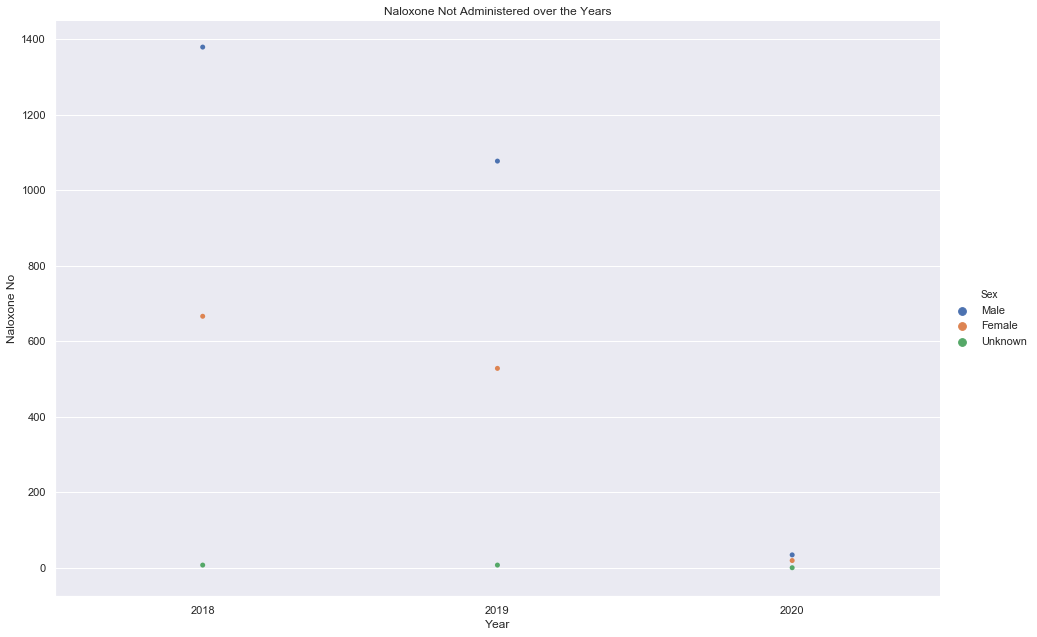

In [66]:
import seaborn as sns; sns.set
sns.set(style="ticks", color_codes=True)
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(11.7,8.27)})

#sns.set(rc={'figure.figsize':(100,30.27)})
import matplotlib.pyplot as plt



#select columns 
tem = ['HEROIN','FENTANYL','Sex','Year','Survive Yes','Naloxone No','MORE THAN 1 Drug']

#filter  
filteredDF = unio_df.filter(items=tem)


nn = sns.catplot(x='Year',y='Naloxone No',hue='Sex',height=8.9,aspect=1.5,kind='swarm',data=filteredDF)
#ax.legend(loc='upper left', bbox_to_anchor=(0, 1.1))
plt.title('Naloxone Not Administered over the Years')

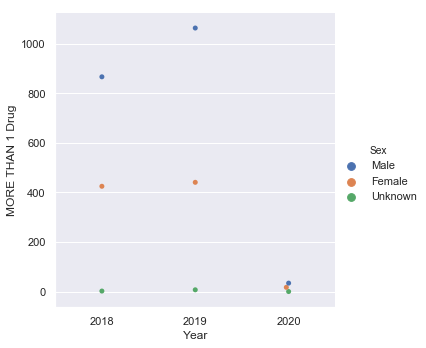

In [65]:
#Naloxone Yes

xx = sns.catplot(x="Year", y= "MORE THAN 1 Drug",hue='Sex', kind='swarm', data=filteredDF)